In [1]:
import pandas as pd
from sklearn.cluster import KMeans # unsupervised clustering approach
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from umap import UMAP  # For UMAP analysis

In [2]:
df1 = pd.read_csv("No_Anemia_50HM_alldata.csv") # Load none anemic data
df1

,Unnamed: 0,Cat4,Cat5,3855,3853,3851,3849,3847,3845,3843,...,545,543,541,539,537,535,533,531,529,527
0,40,50HM,0PRS,0.0127,0.0124,0.0123,0.0123,0.0124,0.0125,0.0125,...,0.1087,0.1071,0.1084,0.1086,0.1053,0.1020,0.1031,0.1072,0.1100,0.1098
1,41,50HM,0PRS,0.0127,0.0124,0.0124,0.0125,0.0127,0.0126,0.0125,...,0.1088,0.1055,0.1067,0.1086,0.1089,0.1094,0.1104,0.1116,0.1140,0.1172
2,42,50HM,0PRS,0.0131,0.0128,0.0128,0.0129,0.0130,0.0130,0.0129,...,0.1094,0.1066,0.1092,0.1131,0.1150,0.1152,0.1162,0.1208,0.1285,0.1344
3,43,50HM,0PRS,0.0139,0.0136,0.0135,0.0135,0.0136,0.0137,0.0138,...,0.1073,0.1072,0.1116,0.1160,0.1183,0.1203,0.1227,0.1234,0.1225,0.1209
4,44,50HM,0PRS,0.0141,0.0138,0.0137,0.0138,0.0139,0.0139,0.0138,...,0.1165,0.1179,0.1225,0.1276,0.1302,0.1278,0.1220,0.1173,0.1169,0.1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,4554,50HM,6PRS,0.0140,0.0137,0.0133,0.0131,0.0132,0.0133,0.0132,...,0.1343,0.1299,0.1277,0.1272,0.1269,0.1294,0.1341,0.1346,0.1312,0.1293
1648,4555,50HM,6PRS,0.0141,0.0136,0.0131,0.0130,0.0132,0.0134,0.0137,...,0.1381,0.1409,0.1408,0.1382,0.1345,0.1299,0.1258,0.1245,0.1246,0.1213
1649,4556,50HM,6PRS,0.0152,0.0154,0.0131,0.0117,0.0120,0.0128,0.0133,...,0.1471,0.1435,0.1380,0.1306,0.1243,0.1212,0.1195,0.1203,0.1244,0.1253
1650,4557,50HM,6PRS,0.0158,0.0158,0.0155,0.0153,0.0152,0.0154,0.0156,...,0.1264,0.1205,0.1186,0.1202,0.1229,0.1271,0.1345,0.1432,0.1476,0.1429


In [3]:
df2 = pd.read_csv("Moderate_Anemia_25HM_alldata.csv") # Load moderate anemic data
df2

,Unnamed: 0,Cat4,Cat5,3855,3853,3851,3849,3847,3845,3843,...,545,543,541,539,537,535,533,531,529,527
0,20,25HM,0.00003PRS,0.0143,0.0139,0.0158,0.0171,0.0168,0.0161,0.0158,...,0.1383,0.1369,0.1384,0.1389,0.1376,0.1380,0.1408,0.1424,0.1421,0.1454
1,21,25HM,0.00003PRS,0.0153,0.0151,0.0151,0.0153,0.0154,0.0154,0.0153,...,0.1411,0.1401,0.1368,0.1336,0.1341,0.1401,0.1504,0.1616,0.1673,0.1638
2,22,25HM,0.00003PRS,0.0157,0.0154,0.0151,0.0151,0.0155,0.0158,0.0161,...,0.1349,0.1408,0.1469,0.1465,0.1398,0.1343,0.1362,0.1452,0.1551,0.1575
3,23,25HM,0.00003PRS,0.0172,0.0175,0.0155,0.0144,0.0150,0.0159,0.0165,...,0.1325,0.1399,0.1471,0.1462,0.1388,0.1327,0.1328,0.1382,0.1440,0.1484
4,24,25HM,0.00003PRS,0.0198,0.0201,0.0183,0.0171,0.0173,0.0180,0.0183,...,0.1471,0.1405,0.1388,0.1412,0.1423,0.1428,0.1490,0.1563,0.1501,0.1334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,4529,25HM,6PRS,0.0126,0.0122,0.0122,0.0124,0.0126,0.0127,0.0127,...,0.1157,0.1096,0.1006,0.0954,0.0957,0.0980,0.0986,0.0955,0.0929,0.0975
1462,4530,25HM,6PRS,0.0130,0.0130,0.0129,0.0130,0.0131,0.0131,0.0132,...,0.1117,0.1133,0.1167,0.1192,0.1196,0.1198,0.1216,0.1234,0.1235,0.1203
1463,4531,25HM,6PRS,0.0132,0.0130,0.0148,0.0158,0.0154,0.0146,0.0143,...,0.1292,0.1241,0.1205,0.1167,0.1127,0.1130,0.1205,0.1286,0.1264,0.1170
1464,4532,25HM,6PRS,0.0133,0.0128,0.0146,0.0158,0.0155,0.0149,0.0147,...,0.1260,0.1178,0.1102,0.1087,0.1107,0.1089,0.1020,0.0974,0.1027,0.1149


In [4]:
df3 = pd.read_csv("Severe_Anemia_12.5HM_alldata.csv") # Load severe anemic data
df3

,Unnamed: 0,Cat4,Cat5,3855,3853,3851,3849,3847,3845,3843,...,545,543,541,539,537,535,533,531,529,527
0,0,12.5HM,0.00003PRS,0.0141,0.0136,0.0153,0.0164,0.0162,0.0155,0.0151,...,0.1400,0.1393,0.1348,0.1285,0.1228,0.1205,0.1223,0.1256,0.1285,0.1329
1,1,12.5HM,0.00003PRS,0.0143,0.0134,0.0148,0.0159,0.0159,0.0155,0.0153,...,0.1391,0.1373,0.1357,0.1340,0.1311,0.1291,0.1317,0.1406,0.1526,0.1592
2,2,12.5HM,0.00003PRS,0.0147,0.0146,0.0143,0.0141,0.0141,0.0140,0.0137,...,0.1376,0.1373,0.1380,0.1367,0.1299,0.1228,0.1225,0.1303,0.1415,0.1507
3,3,12.5HM,0.00003PRS,0.0158,0.0155,0.0152,0.0152,0.0153,0.0152,0.0151,...,0.1415,0.1368,0.1334,0.1322,0.1312,0.1308,0.1331,0.1355,0.1371,0.1428
4,4,12.5HM,0.00003PRS,0.0161,0.0160,0.0157,0.0155,0.0156,0.0158,0.0160,...,0.1440,0.1436,0.1454,0.1461,0.1459,0.1489,0.1555,0.1600,0.1589,0.1560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,4504,12.5HM,6PRS,0.0147,0.0144,0.0144,0.0144,0.0144,0.0143,0.0142,...,0.1232,0.1188,0.1160,0.1164,0.1153,0.1105,0.1059,0.1048,0.1065,0.1077
1437,4505,12.5HM,6PRS,0.0149,0.0144,0.0141,0.0141,0.0143,0.0143,0.0144,...,0.1157,0.1206,0.1244,0.1276,0.1294,0.1269,0.1183,0.1074,0.1028,0.1070
1438,4506,12.5HM,6PRS,0.0150,0.0145,0.0144,0.0146,0.0148,0.0149,0.0149,...,0.1299,0.1306,0.1308,0.1320,0.1317,0.1275,0.1213,0.1153,0.1137,0.1208
1439,4507,12.5HM,6PRS,0.0160,0.0161,0.0140,0.0128,0.0132,0.0138,0.0141,...,0.1227,0.1214,0.1196,0.1203,0.1229,0.1255,0.1275,0.1292,0.1295,0.1277


In [5]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True) # Concatenate data vertically
df

,Unnamed: 0,Cat4,Cat5,3855,3853,3851,3849,3847,3845,3843,...,545,543,541,539,537,535,533,531,529,527
0,40,50HM,0PRS,0.0127,0.0124,0.0123,0.0123,0.0124,0.0125,0.0125,...,0.1087,0.1071,0.1084,0.1086,0.1053,0.1020,0.1031,0.1072,0.1100,0.1098
1,41,50HM,0PRS,0.0127,0.0124,0.0124,0.0125,0.0127,0.0126,0.0125,...,0.1088,0.1055,0.1067,0.1086,0.1089,0.1094,0.1104,0.1116,0.1140,0.1172
2,42,50HM,0PRS,0.0131,0.0128,0.0128,0.0129,0.0130,0.0130,0.0129,...,0.1094,0.1066,0.1092,0.1131,0.1150,0.1152,0.1162,0.1208,0.1285,0.1344
3,43,50HM,0PRS,0.0139,0.0136,0.0135,0.0135,0.0136,0.0137,0.0138,...,0.1073,0.1072,0.1116,0.1160,0.1183,0.1203,0.1227,0.1234,0.1225,0.1209
4,44,50HM,0PRS,0.0141,0.0138,0.0137,0.0138,0.0139,0.0139,0.0138,...,0.1165,0.1179,0.1225,0.1276,0.1302,0.1278,0.1220,0.1173,0.1169,0.1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554,4504,12.5HM,6PRS,0.0147,0.0144,0.0144,0.0144,0.0144,0.0143,0.0142,...,0.1232,0.1188,0.1160,0.1164,0.1153,0.1105,0.1059,0.1048,0.1065,0.1077
4555,4505,12.5HM,6PRS,0.0149,0.0144,0.0141,0.0141,0.0143,0.0143,0.0144,...,0.1157,0.1206,0.1244,0.1276,0.1294,0.1269,0.1183,0.1074,0.1028,0.1070
4556,4506,12.5HM,6PRS,0.0150,0.0145,0.0144,0.0146,0.0148,0.0149,0.0149,...,0.1299,0.1306,0.1308,0.1320,0.1317,0.1275,0.1213,0.1153,0.1137,0.1208
4557,4507,12.5HM,6PRS,0.0160,0.0161,0.0140,0.0128,0.0132,0.0138,0.0141,...,0.1227,0.1214,0.1196,0.1203,0.1229,0.1255,0.1275,0.1292,0.1295,0.1277


In [6]:
df= df.drop(['Cat5', 'Unnamed: 0'], axis=1) # drop columns and keep only anaemic conditions and wavenumbers 
df

,Cat4,3855,3853,3851,3849,3847,3845,3843,3841,3839,...,545,543,541,539,537,535,533,531,529,527
0,50HM,0.0127,0.0124,0.0123,0.0123,0.0124,0.0125,0.0125,0.0125,0.0125,...,0.1087,0.1071,0.1084,0.1086,0.1053,0.1020,0.1031,0.1072,0.1100,0.1098
1,50HM,0.0127,0.0124,0.0124,0.0125,0.0127,0.0126,0.0125,0.0124,0.0124,...,0.1088,0.1055,0.1067,0.1086,0.1089,0.1094,0.1104,0.1116,0.1140,0.1172
2,50HM,0.0131,0.0128,0.0128,0.0129,0.0130,0.0130,0.0129,0.0129,0.0129,...,0.1094,0.1066,0.1092,0.1131,0.1150,0.1152,0.1162,0.1208,0.1285,0.1344
3,50HM,0.0139,0.0136,0.0135,0.0135,0.0136,0.0137,0.0138,0.0138,0.0139,...,0.1073,0.1072,0.1116,0.1160,0.1183,0.1203,0.1227,0.1234,0.1225,0.1209
4,50HM,0.0141,0.0138,0.0137,0.0138,0.0139,0.0139,0.0138,0.0137,0.0137,...,0.1165,0.1179,0.1225,0.1276,0.1302,0.1278,0.1220,0.1173,0.1169,0.1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4554,12.5HM,0.0147,0.0144,0.0144,0.0144,0.0144,0.0143,0.0142,0.0143,0.0145,...,0.1232,0.1188,0.1160,0.1164,0.1153,0.1105,0.1059,0.1048,0.1065,0.1077
4555,12.5HM,0.0149,0.0144,0.0141,0.0141,0.0143,0.0143,0.0144,0.0146,0.0150,...,0.1157,0.1206,0.1244,0.1276,0.1294,0.1269,0.1183,0.1074,0.1028,0.1070
4556,12.5HM,0.0150,0.0145,0.0144,0.0146,0.0148,0.0149,0.0149,0.0148,0.0148,...,0.1299,0.1306,0.1308,0.1320,0.1317,0.1275,0.1213,0.1153,0.1137,0.1208
4557,12.5HM,0.0160,0.0161,0.0140,0.0128,0.0132,0.0138,0.0141,0.0147,0.0155,...,0.1227,0.1214,0.1196,0.1203,0.1229,0.1255,0.1275,0.1292,0.1295,0.1277


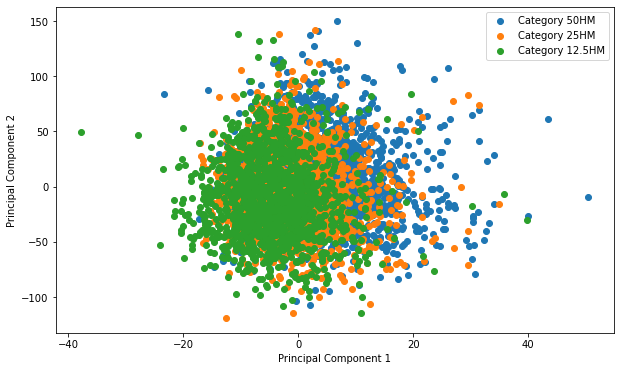

In [8]:
X = df.drop(columns=['Cat4']) # drop and keep separate the target variable (Cat4)


scaler = StandardScaler() # Standardize the features
X_standardized = scaler.fit_transform(X)


pca = PCA(n_components=2) # Apply PCA
X_pca = pca.fit_transform(X_standardized)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2']) # we then create DataFrame with the PCA results

df_pca['Cat4'] = df['Cat4'] # to PCA results add lebels "Cat4"


plt.figure(figsize=(10, 6)) # Figure size, now we draw PCA results 

for category in df_pca['Cat4'].unique():
    
    category_data = df_pca[df_pca['Cat4'] == category] # take only data points for the current category
    
    plt.scatter(category_data['PC2'], category_data['PC1'], label=f'Category {category}', marker='o') # Then Plot the data points with a specific marker style based on 'Cat4' category

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

C:\Users\Issa Mshani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


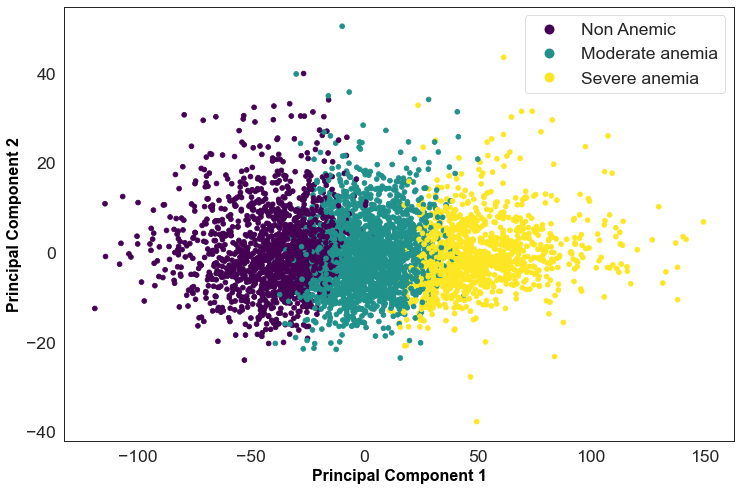

In [11]:
# Lets include clustering by k-means

sns.set(context="paper",

    style="white",

    font_scale=2,
        
    rc={"font.family": "sans-serif"})

rcParams['font.sans-serif'] = 'Arial' # Set the font as Arial, this is NatureComm requirements

fig, ax = plt.subplots(figsize=(12,8))


df['Cat4'] = df['Cat4'].astype(str) # ensure the label 'Cat4' is in string format


kmeans = KMeans(n_clusters=3)  # set clusters espcially for raw X value
df['Cluster'] = kmeans.fit_predict(X)

# Lets use PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

custom_legend_labels = ['Non Anemic', 'Moderate anemia', 'Severe anemia'] # Legend labels and their order

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis') # lets color each cluster

#Legend based on customized legend labels

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), 
                             markersize=11, label=label) for i, label in enumerate(custom_legend_labels)]
plt.legend(handles=legend_handles, loc='upper right')

plt.xlabel('Principal Component 1', fontsize=16, weight="bold", color='black')
plt.ylabel('Principal Component 2', fontsize=16, weight="bold", color='black')
plt.show()


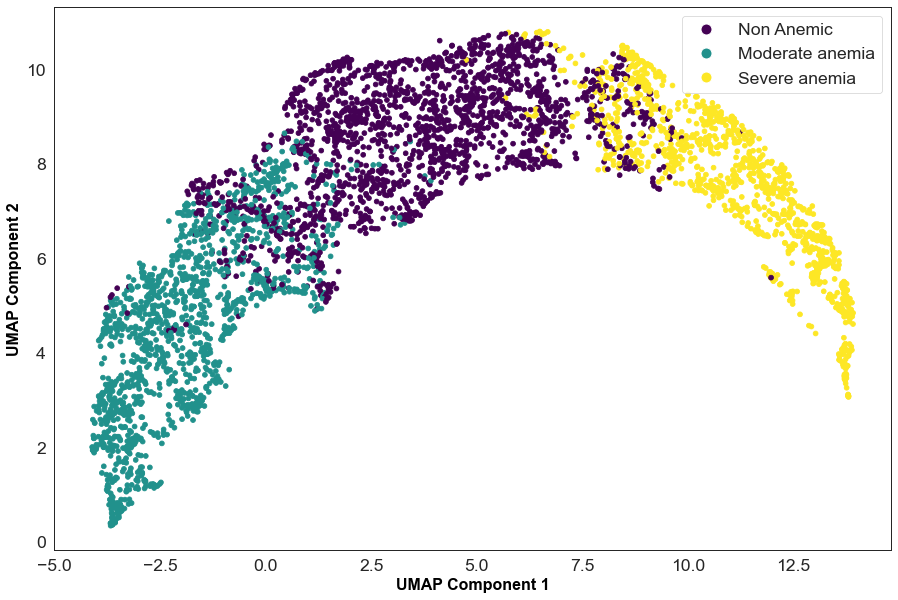

In [25]:
# Lets use UMAP instead of PCA

# First, I apply K-Means clustering
n_clusters = 3
n_init_value = 100  # Number of initializations
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init_value, random_state=None)
df['Cluster'] = kmeans.fit_predict(X)


umap = UMAP(n_components=2) # Now we apply UMAP for visualization
X_umap = umap.fit_transform(X_standardized)

custom_legend_labels = ['Non Anemic', 'Moderate anemia', 'Severe anemia'] # legend labels and their order


scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['Cluster'], cmap='viridis') # lets color each cluster

#Legend based on customized legend labels

legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), 
                             markersize=11, label=label) for i, label in enumerate(custom_legend_labels)]
plt.legend(handles=legend_handles, loc='upper right')

plt.xlabel('UMAP Component 1', fontsize=16, weight="bold", color='black')
plt.ylabel('UMAP Component 2', fontsize=16, weight="bold", color='black')
plt.show()
